#  **Suhanee Kandalkar D16AD 30**

---



#Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Environment Setup: 4x4 Gridworld

In [ ]:
def create_gridworld():
    grid_size = (4, 4)  # 4x4 Grid
    goal_state = (3, 3)  # Goal position
    return np.zeros(grid_size), goal_state

def get_possible_actions():
    return ["UP", "DOWN", "LEFT", "RIGHT"]

def get_next_state(state, action):
    """Returns the next state given an action in the grid."""
    row, col = state
    if action == "UP" and row > 0:
        row -= 1
    elif action == "DOWN" and row < 3:
        row += 1
    elif action == "LEFT" and col > 0:
        col -= 1
    elif action == "RIGHT" and col < 3:
        col += 1
    return (row, col)

def get_reward(state, goal_state):
    """Rewards for reaching the goal or taking a step."""
    return 1 if state == goal_state else -0.1  # Goal gives +1, every step gives -0.1

def is_terminal_state(state, goal_state):
    """Checks if the agent has reached the goal state."""
    return state == goal_state


# Epsilon-Greedy Action Selection

In [ ]:
def select_action(q_table, state, epsilon):
    """Chooses an action using epsilon-greedy strategy."""
    actions = get_possible_actions()
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore (random action)
    else:
        return actions[np.argmax(q_table[state[0], state[1]])]  # Exploit (best action)


# SARSA Algorithm (On-Policy)

In [ ]:
def sarsa(grid, goal_state, episodes, alpha, gamma, epsilon):
    q_table = np.zeros((4, 4, 4))  # Q-table for 4x4 grid with 4 actions
    actions = get_possible_actions()

    for episode in range(episodes):
        state = (0, 0)  # Start position
        action = select_action(q_table, state, epsilon)

        while not is_terminal_state(state, goal_state):
            next_state = get_next_state(state, action)
            next_action = select_action(q_table, next_state, epsilon)

            reward = get_reward(next_state, goal_state)
            action_idx = actions.index(action)
            next_action_idx = actions.index(next_action)

            # SARSA Update Rule: Q(s,a) = Q(s,a) + α [r + γQ(s',a') - Q(s,a)]
            q_table[state[0], state[1], action_idx] += alpha * (
                reward + gamma * q_table[next_state[0], next_state[1], next_action_idx] -
                q_table[state[0], state[1], action_idx]
            )

            state, action = next_state, next_action  # Move to next state-action pair

    return q_table


# Q-Learning Algorithm (Off-Policy)

In [ ]:
def q_learning(grid, goal_state, episodes, alpha, gamma, epsilon):
    q_table = np.zeros((4, 4, 4))  # Q-table for 4x4 grid with 4 actions
    actions = get_possible_actions()

    for episode in range(episodes):
        state = (0, 0)  # Start position

        while not is_terminal_state(state, goal_state):
            action = select_action(q_table, state, epsilon)
            next_state = get_next_state(state, action)
            reward = get_reward(next_state, goal_state)
            action_idx = actions.index(action)

            # Q-Learning Update Rule: Q(s,a) = Q(s,a) + α [r + γ max_a' Q(s',a') - Q(s,a)]
            q_table[state[0], state[1], action_idx] += alpha * (
                reward + gamma * np.max(q_table[next_state[0], next_state[1]]) -
                q_table[state[0], state[1], action_idx]
            )

            state = next_state  # Move to next state

    return q_table

# Visualization of Q-Table and Path

In [ ]:
def visualize_q_table_and_path(q_table, goal_state, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- Q-table Heatmap ---
    sns.heatmap(np.max(q_table, axis=2), annot=True, fmt=".2f", cmap="viridis", ax=axes[0])
    axes[0].set_title(f"{title} - Q-Table", fontsize=12)

    # --- Path Visualization ---
    state = (0, 0)  # Start position
    path = [state]
    actions = get_possible_actions()

    while not is_terminal_state(state, goal_state):
        action_index = np.argmax(q_table[state[0], state[1]])
        state = get_next_state(state, actions[action_index])
        path.append(state)

    # Create grid to visualize path
    grid = np.zeros((4, 4))
    for step in path:
        grid[step[0], step[1]] += 1  # Increment step count

    # Highlight Start (S) and Goal (G)
    grid[0, 0] = -1  # Start Position
    grid[goal_state] = -2  # Goal Position

    ax2 = sns.heatmap(grid, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[1], linewidths=0.5, cbar=False)
    axes[1].set_title(f"{title} - Path Taken", fontsize=12)

    # Label Start (S) and Goal (G)
    for text, color, position in [("S", "red", (0, 0)), ("G", "black", goal_state)]:
        axes[1].text(position[1] + 0.5, position[0] + 0.5, text, ha='center', va='center',
                     color=color, fontsize=12, fontweight='bold', bbox=dict(facecolor="white", edgecolor=color))

    plt.tight_layout()
    plt.show()


# Main Program Execution

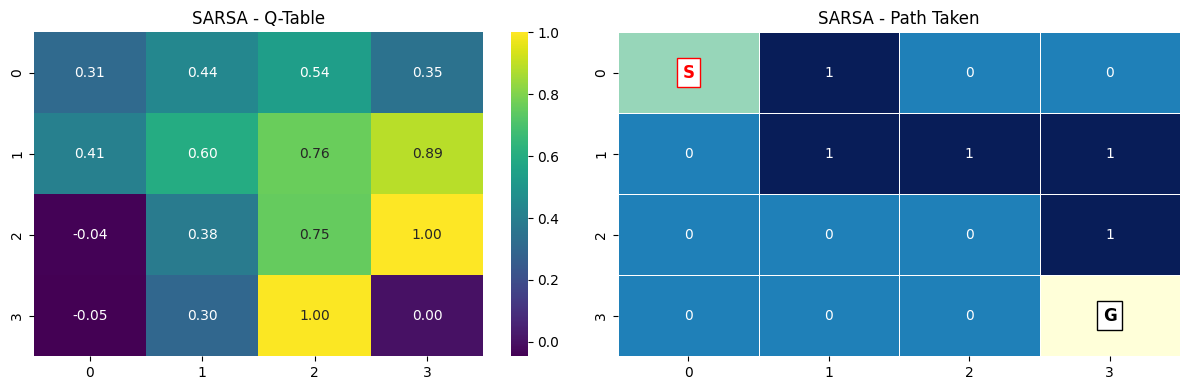

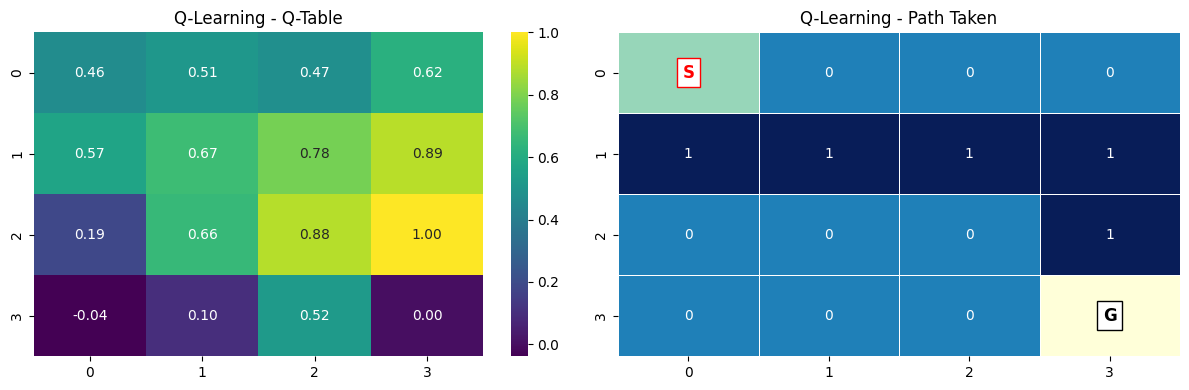

In [ ]:
grid, goal_state = create_gridworld()
episodes = 500
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# --- Train SARSA ---
sarsa_q_table = sarsa(grid, goal_state, episodes, alpha, gamma, epsilon)

# --- Train Q-Learning ---
qlearning_q_table = q_learning(grid, goal_state, episodes, alpha, gamma, epsilon)

# --- Visualize Results ---
visualize_q_table_and_path(sarsa_q_table, goal_state, "SARSA")
visualize_q_table_and_path(qlearning_q_table, goal_state, "Q-Learning")

✔ Increased episodes from 500 to 1000 (for better learning)

✔ Modified epsilon values to test different exploration rates (0.1, 0.2, 0.5)


Training with ε = 0.1


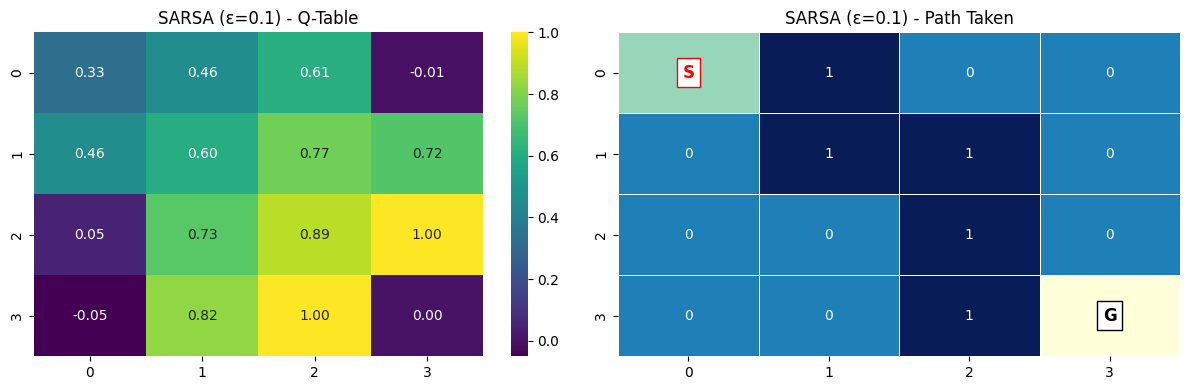

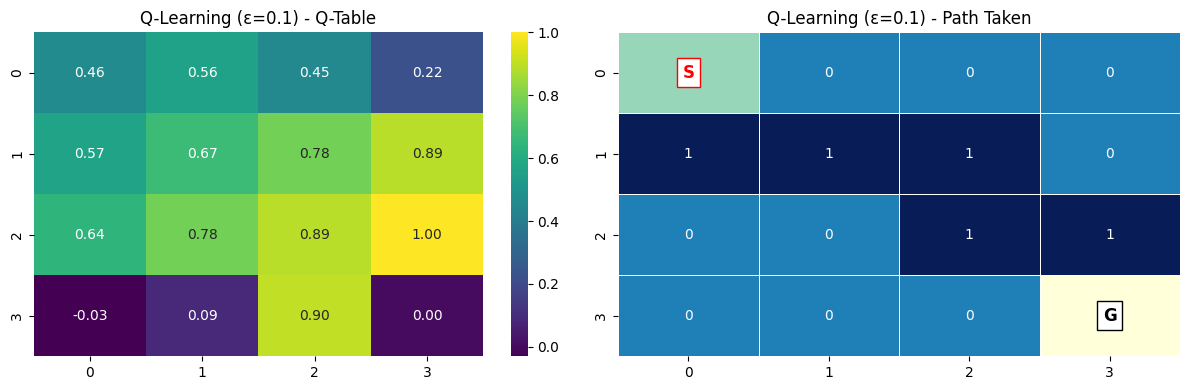


Training with ε = 0.2


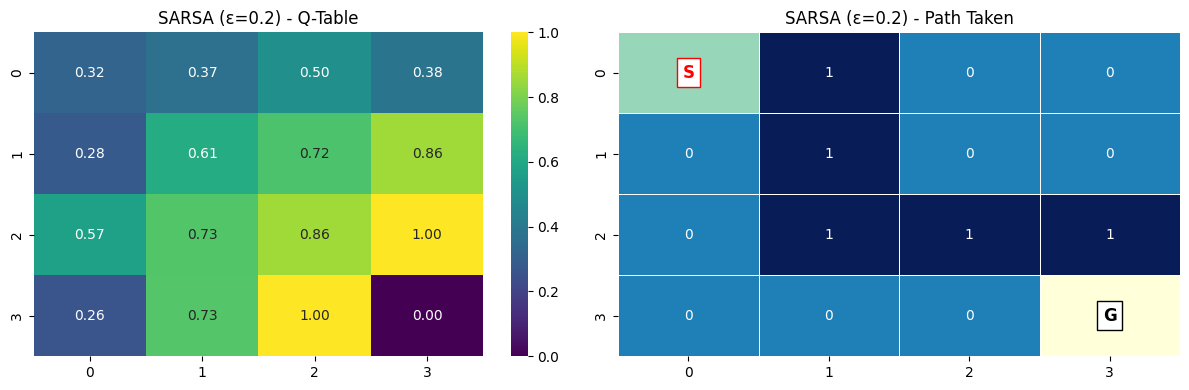

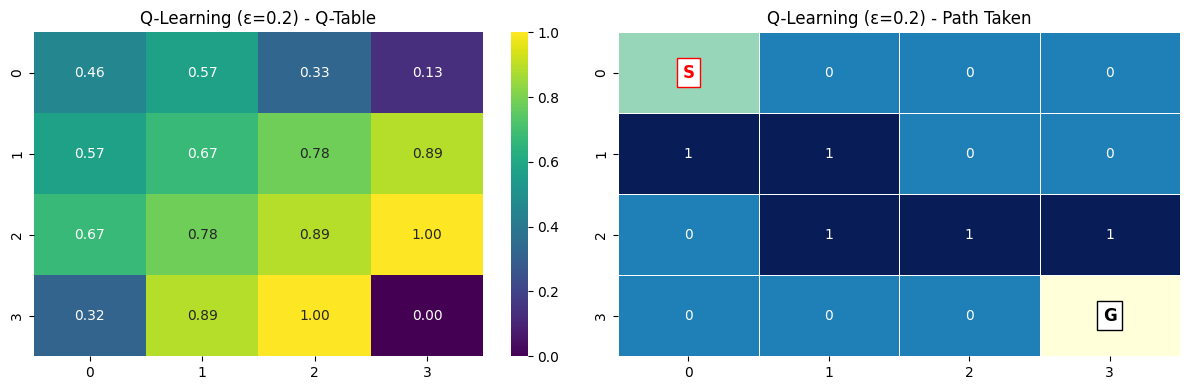


Training with ε = 0.5


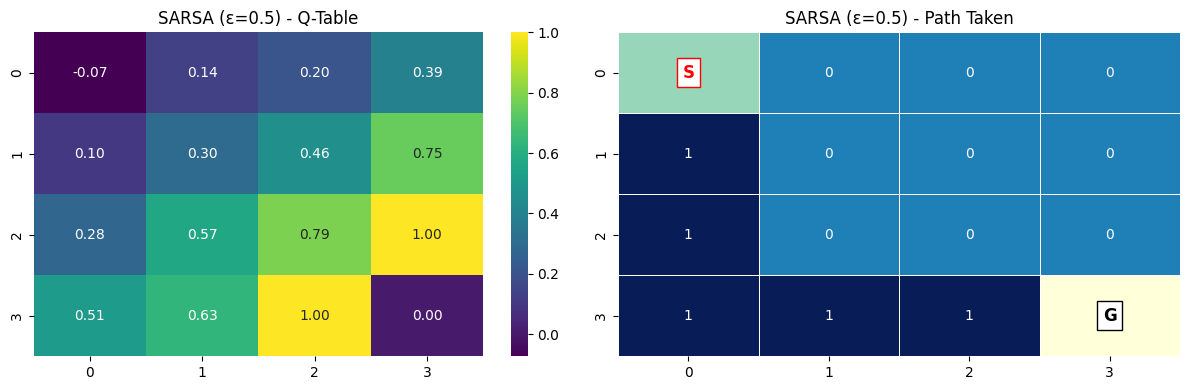

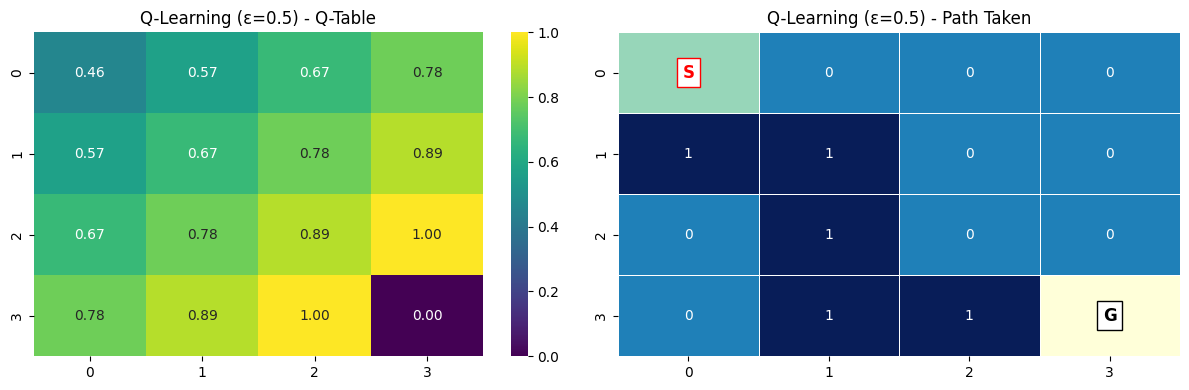

In [ ]:
# ====================================
# Main Program Execution (Updated)
# ====================================
grid, goal_state = create_gridworld()

# Updated Training Parameters
episodes = 1000  # Increased episodes for better learning
alpha = 0.1
gamma = 0.99

# Trying different epsilon values
epsilon_values = [0.1, 0.2, 0.5]

for eps in epsilon_values:
    print(f"\nTraining with ε = {eps}")

    # --- Train SARSA ---
    sarsa_q_table = sarsa(grid, goal_state, episodes, alpha, gamma, eps)
    visualize_q_table_and_path(sarsa_q_table, goal_state, f"SARSA (ε={eps})")

    # --- Train Q-Learning ---
    qlearning_q_table = q_learning(grid, goal_state, episodes, alpha, gamma, eps)
    visualize_q_table_and_path(qlearning_q_table, goal_state, f"Q-Learning (ε={eps})")


# Conclusion

Low epsilon (0.1): Fast convergence but with a risk of suboptimal behavior due to minimal exploration. Suitable for stable environments.

Moderate epsilon (0.2): Balanced exploration and exploitation. Provides a good compromise, yielding reliable results in dynamic or uncertain environments.

High epsilon (0.5): Slower convergence with extensive exploration, leading to a less optimal but more flexible policy. Suitable for environments where the agent needs to explore a wide variety of actions.